<img src="./img/HWNI_logo.svg"/>

# Lab 02a - Inferential Statistics

In [52]:
# makes our plots show up inside Jupyter
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")
sns.set(color_codes=True)

import util.lab02utils as utils 

# this makes our tables easier to read
utils.formatDataframes()

ImportError: No module named 'util'

## Parametric Estimation

When doing inferential statistics, we get the best result when we take the underlying distribution of the data into account.

Examples: for some distributions, the mean and the median are in the same spot (what do we call this property?). This spot used to be called the "location parameter". Therefore it's sensible to ask: what do we use to estimate this "center"? 

Let's look at examples. The Gaussian distribution is one. The _Laplace distribution_, used in Olshausen and Field's sparse coding model of V1, is another. In this model, it describes the activity of pairs of neurons with equal but opposite receptive fields. The x-axis shows the firing rate of one neuron minus the firing rate of the other. V1 neurons fire infrequently, so this value is usually close to 0, so the probability of 0 is high. But when one of the neurons is firing, it tends to fire a lot, and the other tends to be silent (lack-of-shoulders, heavier tails).

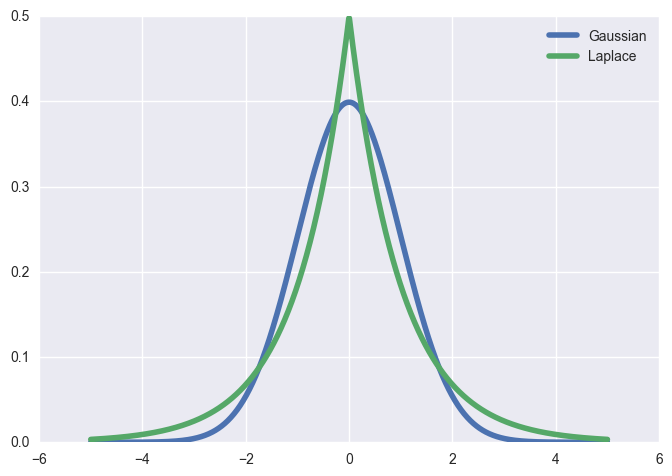

In [120]:
norm = scipy.stats.norm()
laplace = scipy.stats.laplace()
xs = np.linspace(-5,5,1000)

plt.plot(xs,[norm.pdf(x) for x in xs],linewidth=4,label='Gaussian');
plt.plot(xs,[laplace.pdf(x) for x in xs],linewidth=4,label='Laplace');

plt.legend();

In [86]:
def generateDataset(N=15,distribution='gauss'):
    if distribution == 'laplace':
        return np.random.laplace(scale=4,size=N)
    elif distribution == 'gauss':
        return np.random.normal(scale=4,size=N)
    elif distribution == 't':
        return np.random.standard_t(df=4)
    else:
        return []

In [87]:
def runExperiment(distribution='gauss',numDatasets=2500,datasetSize=5,):
    means = []; medians = []
    datasets = [generateDataset(datasetSize,distribution) for _ in range(numDatasets)]
    
    for dataset in datasets:
        means.append(np.mean(dataset))
        medians.append(np.median(dataset))
        
    return means, medians

def plotExperiment(means,medians,distribution='gauss'):
    styleDictionary = { 'linewidth': 4,
                          'edgecolor': 'white',
                           'normed':True}
    mn = min(min(means),min(medians))
    mx = max(max(medians),max(means))
    bins = np.linspace(mn,mx,25)
    
    sns.distplot(means,label='means',kde=False,bins=bins,hist_kws=styleDictionary);
    sns.distplot(medians,label='medians',kde=False,bins=bins,hist_kws=styleDictionary);
    
    plt.vlines(0,ymin=0,ymax = plt.ylim()[1],
           linewidth=4,linestyle = '--',
           label='true value')
    
    plt.legend()
    
    MSE_mean = np.mean(np.square(means))
    MSE_median = np.mean(np.square(medians))
    
    print("Average Squared Error for mean is: {}".format(MSE_mean))
    print("Average Squared Error for median is: {}".format(MSE_median))
    
    return

Average Squared Error for mean is: 0.029734504487915592
Average Squared Error for median is: 0.015830175716200823


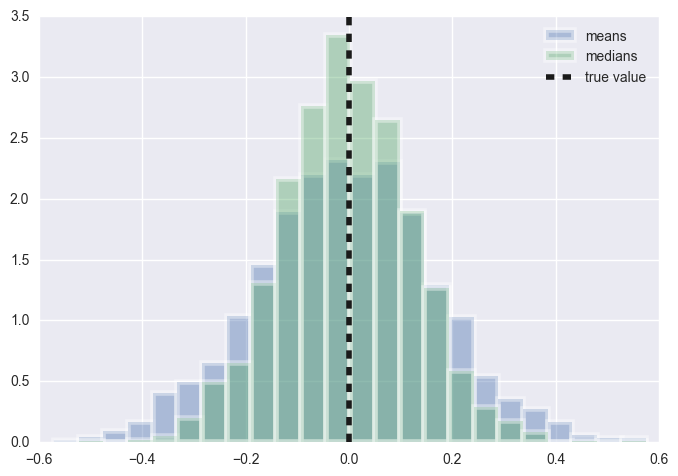

In [95]:
means, medians = runExperiment(distribution='laplace',numDatasets=2500,datasetSize=1000,)

plotExperiment(means,medians,distribution='laplace')

For both distributions, which estimator has a better average squared error at a dataset size of 5?

Increase the size to 50, and then 1000. What happens to the average squared error? Does the best estimator stay the same?

It's often said that the median is "robust to outliers". How does this connect to its performance as an estimator here?



## Confidence Intervals

In [115]:
def computeMean(dataset):
    return np.mean(dataset)

def computeConfidenceInterval(dataset):
    mean = computeMean(dataset)
    seHat = np.std(dataset)/np.sqrt(len(dataset))
    interval = [mean-2*seHat,mean+2*seHat]
    return interval

def plotConfidenceIntervals(intervals,trueMean):
    numIntervals = len(intervals)
    mins = [interval[0] for interval in intervals]
    maxs = [interval[1] for interval in intervals]
    for idx,interval in enumerate(intervals):
        if interval[0] < trueMean < interval[1]:
            color = 'black'
        else:
            color = 'red'
        plt.hlines(idx,interval[0],interval[1],color=color)
        plt.xlim([-4,4])
    return

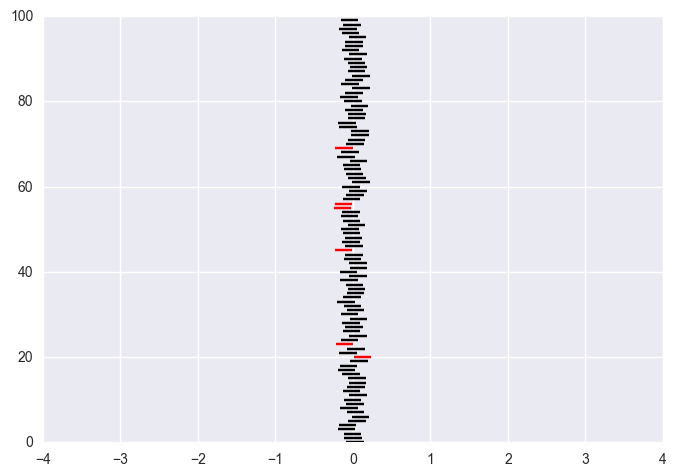

In [118]:
datasetSize = 5000
distribution = 'gauss'
numDatasets = 100

datasets = [generateDataset(datasetSize,distribution) for _ in range(numDatasets)]

intervals = [computeConfidenceInterval(dataset) for dataset in datasets]

plotConfidenceIntervals(intervals,0)

write a function to compute how many intervals contain the true parameter. what value do you expect to see?

now, run this experiment many times and check - is it close to this value?

increase the datasetSize. Does the fraction go down? Why is this happening? Is this what you expected?

compare gauss and laplace, with n at 5 and n at 50 -- CLT!
